<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [39]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [10]:
## Write your code here
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
#RemoteWork missing volume of data is not too high, mode imputation gives reasonable default without hurting distribution too much
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0]) 
#JobSat missing colume of data is very high, it is a subjective column, randomly filling subjective data can lead to false insights, thus drop missing values
df = df.dropna(subset = ['JobSat'])

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


<Axes: title={'center': 'Job Satisfaction by Coding Experience'}, xlabel='Experience Range', ylabel='Median Job Satisfaction'>

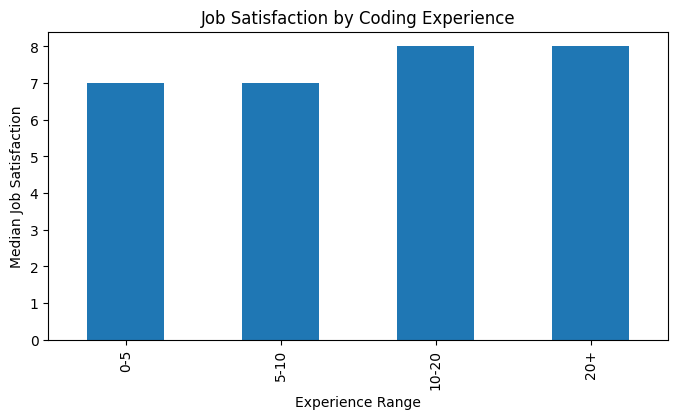

In [29]:
## Write your code here
df = df.copy()

df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than one year': '0',
    'Less than 1 year': '0', 
    'More than 50 years': '50'})
#Convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#Fill missing data with median
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

bins = [-1, 5, 10, 20, 100] 
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins = bins, labels = labels)

median_satisfaction = df.groupby('ExperienceRange', observed=False)['JobSat'].median() 

median_satisfaction.plot(kind='bar', figsize=(8,4), 
                         ylabel = 'Median Job Satisfaction',
                         xlabel = 'Experience Range',
                         title = 'Job Satisfaction by Coding Experience')


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0')])

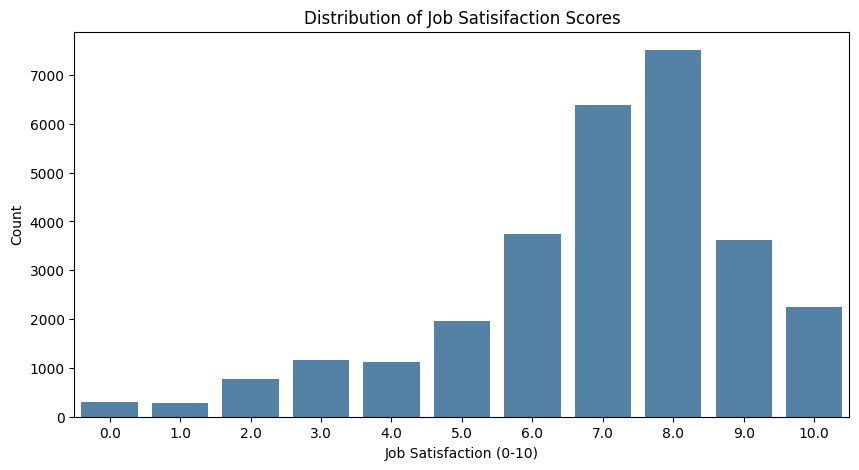

In [30]:
## Write your code here
plt.figure(figsize = (10,5))
sns.countplot(data=df, x='JobSat', color='steelblue')

plt.title('Distribution of Job Satisifaction Scores') 
plt.xlabel('Job Satisfaction (0-10)') 
plt.ylabel('Count') 
plt.xticks(rotation=0) 

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


Text(0, 0.5, 'Count')

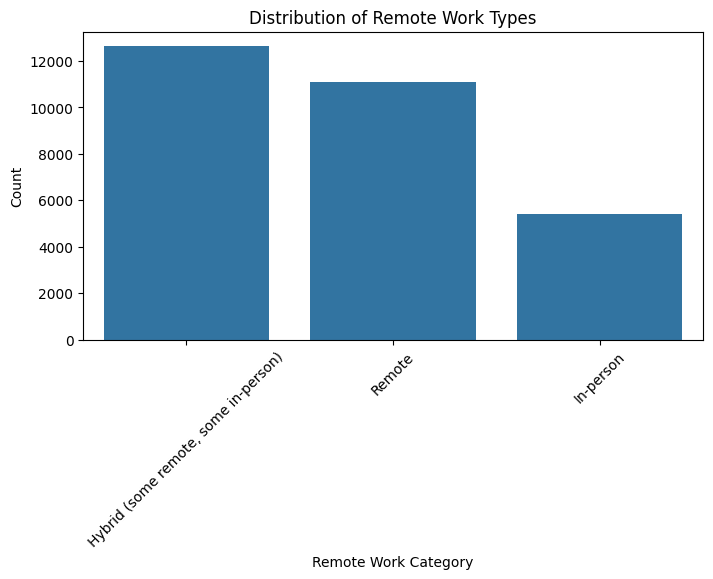

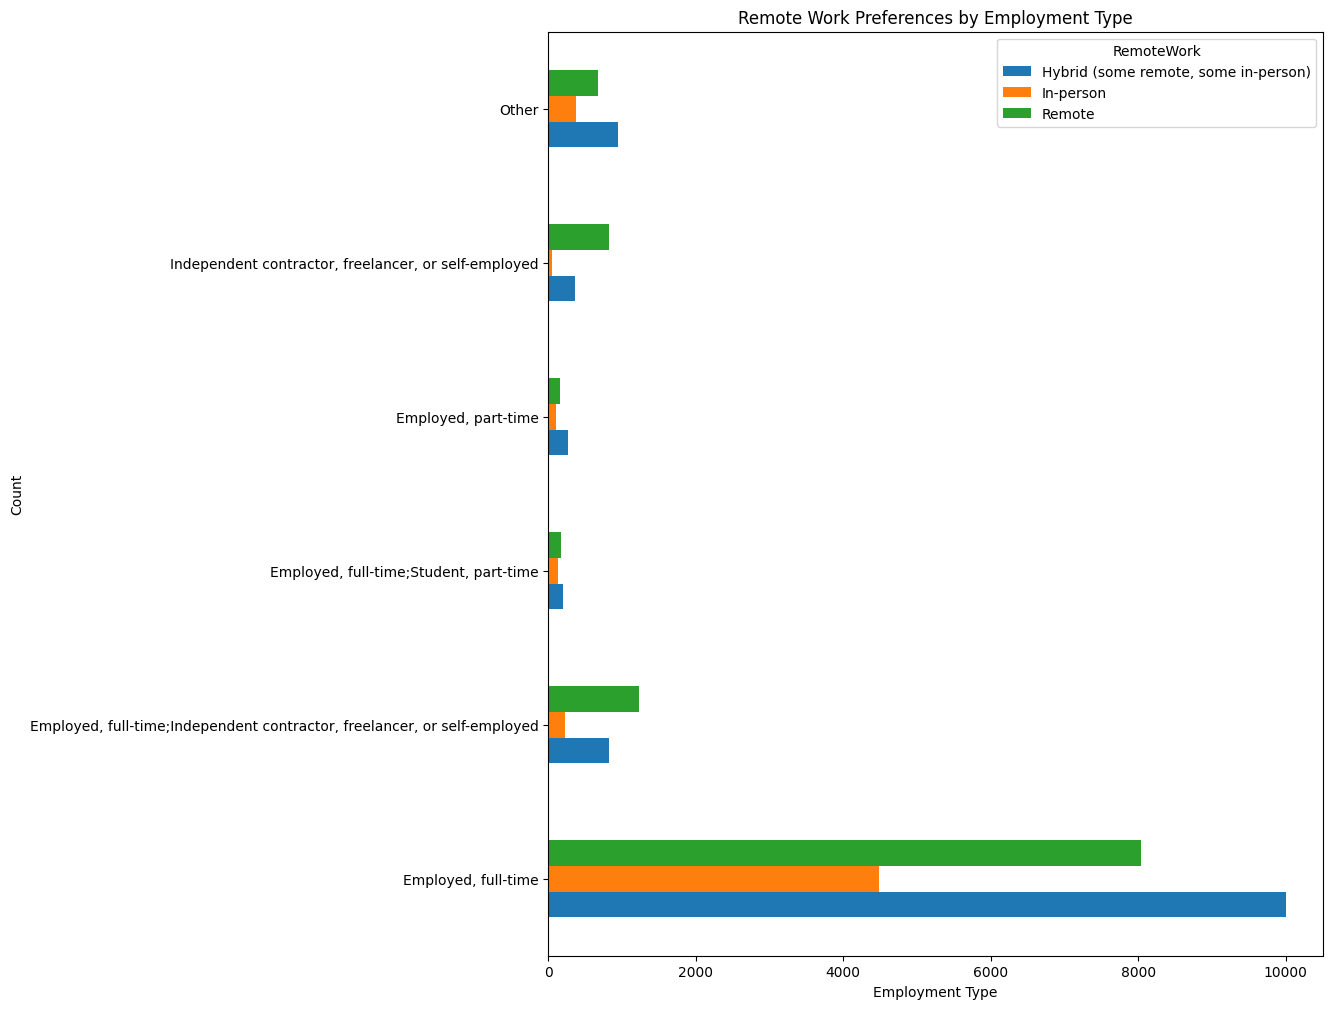

In [36]:
## Write your code here
#Show distribution of how many people work remote, in-person, and, hybrid
plt.figure(figsize=(8,4)) 
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Types')
plt.xlabel('Remote Work Category')
plt.ylabel('Count') 
plt.xticks(rotation=45) 

#Make new column of employment that is cleaner
counts = df['Employment'].value_counts() 
#Keep only categories with >500 responses 
major_roles = counts[counts > 500].index 
df['Employment_Simple'] = df['Employment'].where(df['Employment'].isin(major_roles), 'Other')

#Cross tab of how categories relate
remote_by_employment = pd.crosstab(df['Employment_Simple'], df['RemoteWork']) 

#Visualisation of Cross Tab
remote_by_employment.plot(kind='barh', figsize=(10,12)) 
plt.title('Remote Work Preferences by Employment Type') 
plt.xlabel('Employment Type') 
plt.ylabel('Count') 

#Top 10 plot might be prettier? 
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y='Employment',
    x='RemoteWork',
    order=df['Employment'].value_counts().head(10).index) 
plt.title('Top 10 Employment Types by Remote 


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Text(145.72222222222223, 0.5, 'Country')

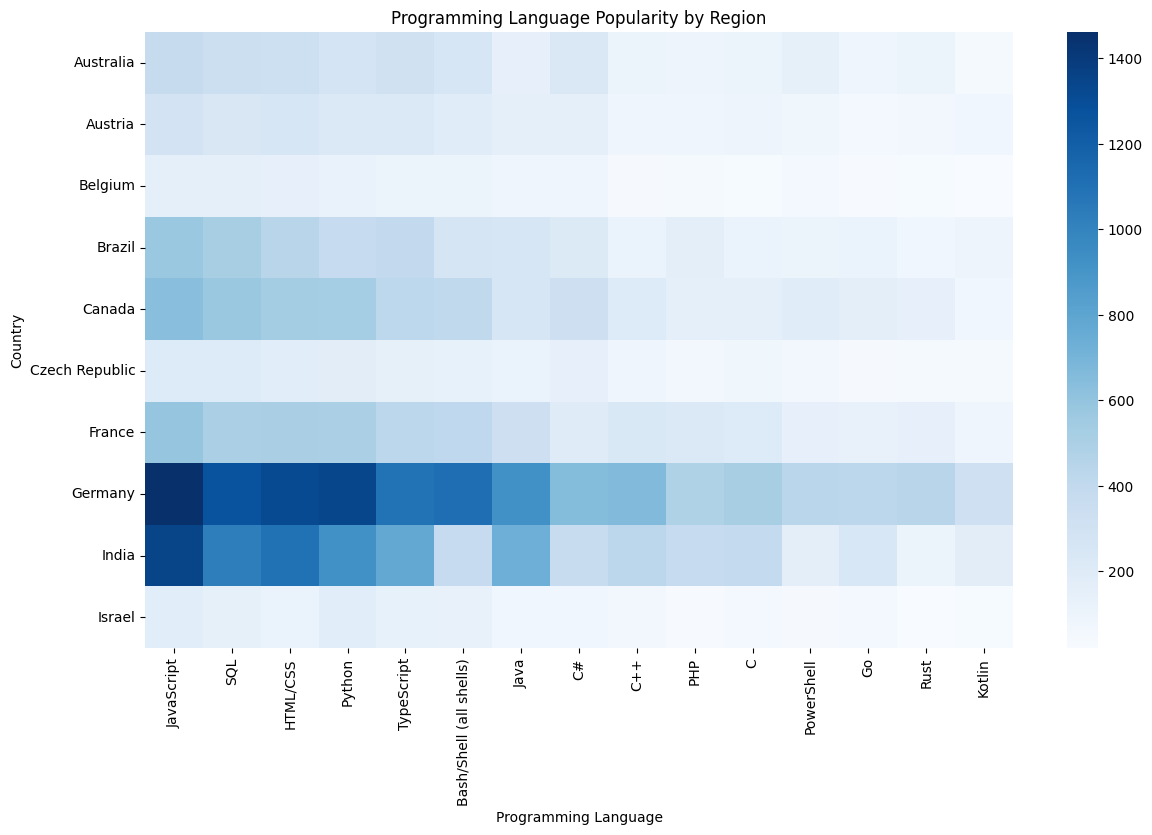

In [56]:
## Write your code here
#Clean country column
country_map = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Iran, Islamic Republic of...": "Iran",
    "Republic of North Macedonia": "North Macedonia",
    "United Republic of Tanzania": "Tanzania",
    "Russian Federation": "Russia",
    "Venezuela, Bolivarian Republic of...": "Venezuela", 
    "Republic of Korea": "South Korea",
    "Bosnia and Herzegovina": "Bosina",
    "Republic of Moldova": "Moldova", 
    "United Arab Emirates": "UAE", 
    "Lao People's Democratic Republic": "Laos",
    "Democratic Republic of the Congo": "Congo",
    "Democratic Republic of Korea": "North Korea",
    "Syrian Arab Republic": "Syria", 
    "Congo, Republic of the...": "Congo",
    "Central African Republic": "Central Africa",
    "Libyan Arab Jamahiriya": "Libya",
    "Micronesia, Federated States of...": "Micronesia"}

df['Country'] = df['Country'].replace(country_map)

#Reduce extremly rare countries by grouping
top_countries = df['Country'].value_counts().head(20).index
df['Country_Simple'] = df['Country'].where(df['Country'].isin(top_countries), 'Other')

#Cleaning the LanguageHaveWorkedWith column
df['Languages_List'] = df['LanguageHaveWorkedWith'].str.split(';')
#Make each row contain one language instead of a list
df_exploded = df.explode('Languages_List').rename(columns={'Languages_List': 'Language'})
df_exploded['Language'] = df_exploded['Language'].str.strip()

#Create the crosstab
lang_region = pd.crosstab(
    df_exploded['Country_Simple'],
    df_exploded['Language'])

#Limit to top languages
top_langs = df_exploded['Language'].value_counts().head(15).index
lang_region = lang_region.loc[:, lang_region.columns.isin(top_langs)]

#Visualise top language across regions using a heatmap
lang_region_top = lang_region[top_langs] 
lang_region_top = lang_region_top.iloc[:10, :] 

plt.figure(figsize=(14,8))
sns.heatmap(lang_region_top, cmap='Blues')
plt.title('Programming Language Popularity by Region')
plt.xlabel('Programming Language')
plt.ylabel('Country')

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Text(0, 0.5, 'Job Satisfaction(Points)')

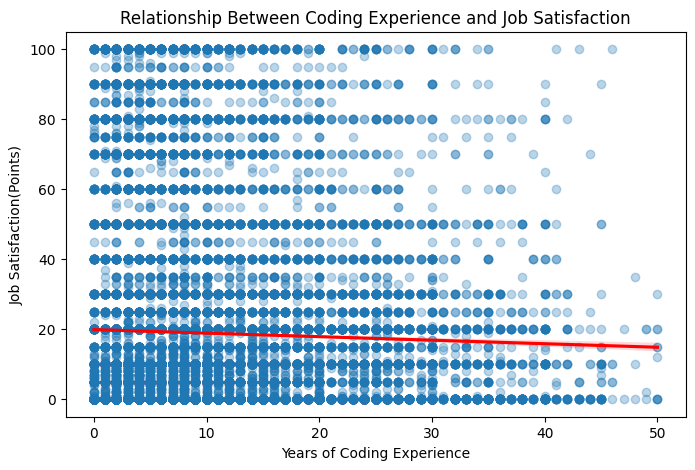

In [61]:
## Write your code here
#Ensure YearsCodePro is numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

#Remove missing values from JobSatPoints_1, YearsCodePro does not have null values
df['JobSatPoints_1_clean'] = df['JobSatPoints_1'].dropna()

plt.figure(figsize=(8,5)) 
sns.regplot(
    data=df,
    x='YearsCodePro',
    y='JobSatPoints_1_clean',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Coding Experience and Job Satisfaction')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Job Satisfaction(Points)')


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment_Simple          Employed, full-time  \
EdLevel_Clean                                    
Associate                                  674   
Bachelor's                               10497   
College(no degree)                        2285   
Master's                                  6731   
Primary/elementary school                   98   
Professional                              1147   
Secondary School                           891   
Something else                             214   

Employment_Simple          Employed, full-time;Independent contractor, freelancer, or self-employed  \
EdLevel_Clean                                                                                         
Associate                                                                 75                          
Bachelor's                                                               961                          
College(no degree)                                                       345           

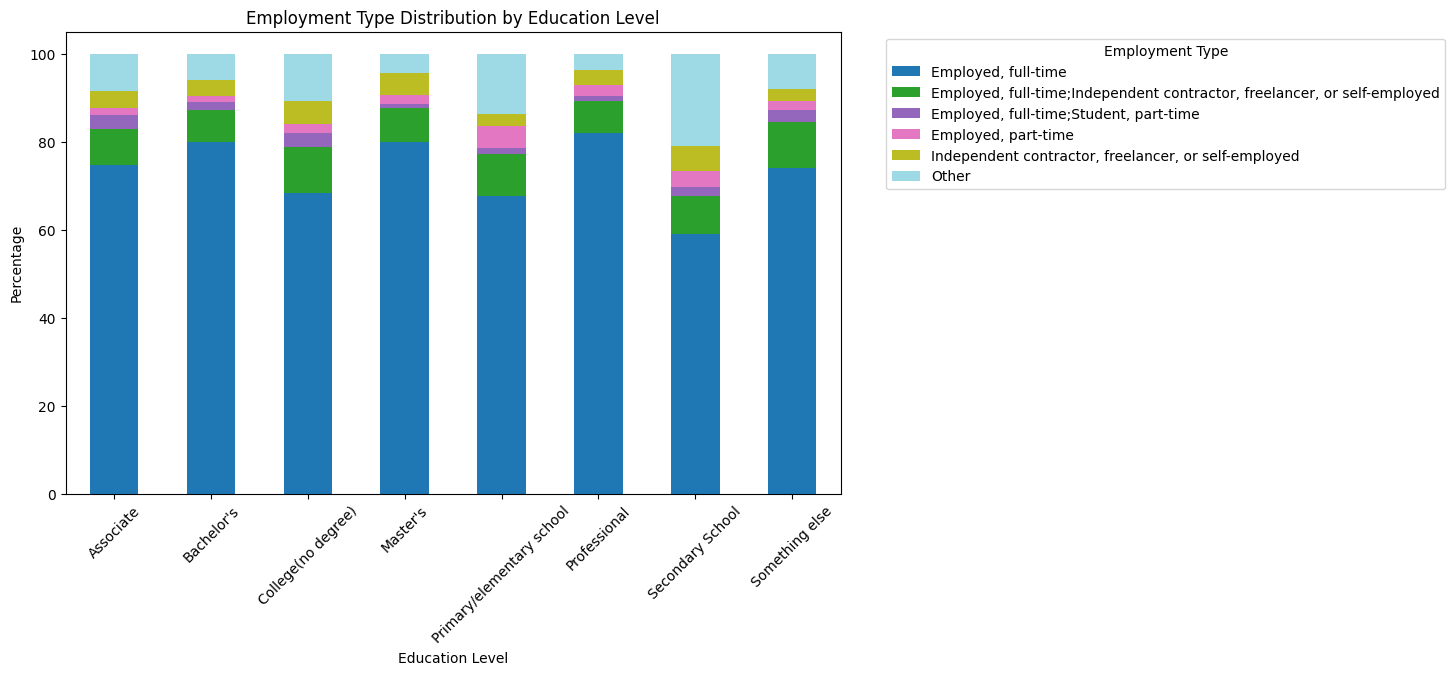

In [62]:
## Write your code here
#Clean EdLevel
edlevel_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Some college/university study without earning a degree": "College(no degree)",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Something else": "Something else"}

df['EdLevel_Clean'] = df['EdLevel'].replace(edlevel_map)

#Make new column of employment that is cleaner
counts = df['Employment'].value_counts() 
#Keep only categories with >500 responses 
major_roles = counts[counts > 500].index 
df['Employment_Simple'] = df['Employment'].where(df['Employment'].isin(major_roles), 'Other')

#Crosstab
ct = pd.crosstab(df['EdLevel_Clean'], df['Employment_Simple'])
print(ct) 

#Normalize to percentages 
ct_pct = pd.crosstab(
    df['EdLevel_Clean'],
    df['Employment_Simple'],
    normalize='index') * 100
print(ct_pct)

#Stacked bar chart visualisation
ct_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20')
plt.title("Employment Type Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [63]:
## Write your code here
df.to_csv("cleaned_dataset.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
